In [43]:
from google.colab import files
files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


Saving gender_submission.csv to gender_submission (3).csv
Saving test.csv to test (3).csv
Saving train.csv to train (3).csv


In [44]:
import pandas as pd

df = pd.read_csv("train (3).csv")
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


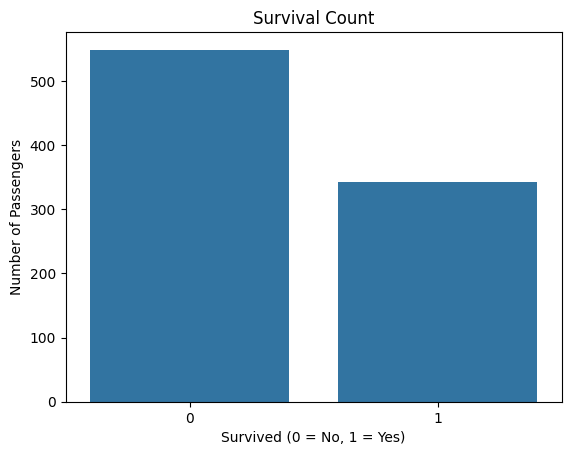

In [45]:
sns.countplot(x="Survived", data=df)
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Number of Passengers")
plt.show()


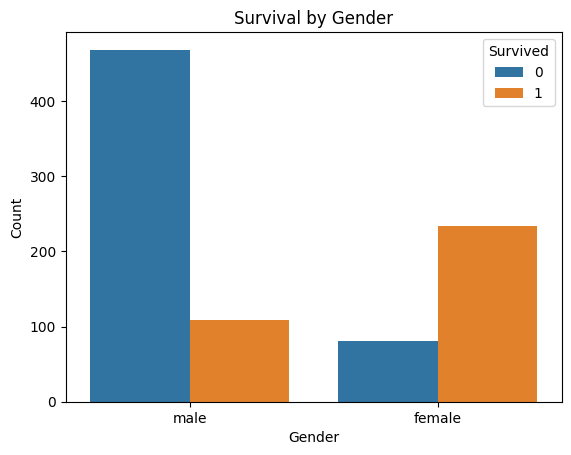

In [46]:
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


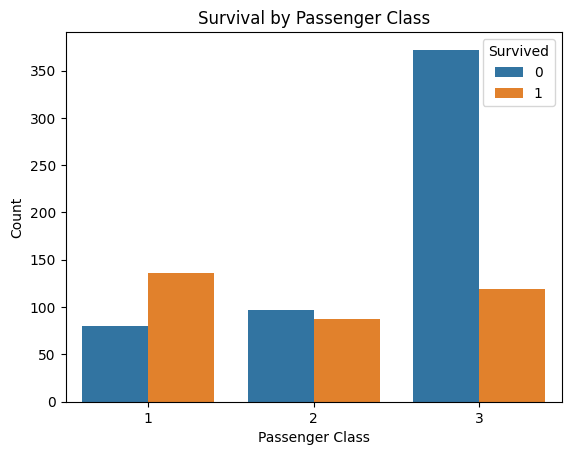

In [47]:
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()


In [48]:

test["Age"].fillna(test["Age"].median(), inplace=True)
test["Fare"].fillna(test["Fare"].median(), inplace=True)
test["Embarked"].fillna(test["Embarked"].mode()[0], inplace=True)


from sklearn.preprocessing import LabelEncoder

test["Sex"] = LabelEncoder().fit_transform(test["Sex"])
test["Embarked"] = LabelEncoder().fit_transform(test["Embarked"])



/tmp/ipython-input-1055403101.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test["Age"].fillna(test["Age"].median(), inplace=True)
/tmp/ipython-input-1055403101.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [49]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X_test = test[features]


In [50]:
model = RandomForestClassifier(
    n_estimators=200,
    random_state=43
)

model.fit(X, y)


RandomForestClassifier(n_estimators=200, random_state=43)

In [51]:
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation accuracy:", cv_scores.mean())


Cross-validation accuracy: 0.8058690603226415


In [52]:
model = RandomForestClassifier(
    n_estimators=200,
    random_state=43
)

model.fit(X, y)


RandomForestClassifier(n_estimators=200, random_state=43)

In [53]:
print(model)
print(X.shape)
print(X_test.shape)





RandomForestClassifier(n_estimators=200, random_state=43)
(891, 7)
(418, 7)


In [54]:
predictions = model.predict(X_test)



In [55]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": predictions
})

submission.to_csv("titanic_submission.csv", index=False)
print("Submission file created successfully!")


Submission file created successfully!


In [56]:
from google.colab import files
files.download("titanic_submission.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>